# World Happiness Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
Happiness = pd.read_csv(r"C:\Users\vishw\OneDrive\Desktop\Python Data Analyst Project\World Happiness Report up to 2022\2022.csv")

In [4]:
Happiness

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


In [6]:
Happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

# Data Cleaning

Rename the columns

In [8]:
Happiness.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [9]:
coloms = {'RANK':'Rank',
         'Whisker-high':'Whisker_high',
         'Whisker-low':'Whisker_low',
         'Explained by: GDP per capita':'GDP_per_capita',
         'Explained by: Social support':'Social_support',
         'Explained by: Healthy life expectancy':'Healthy_life_expectancy',
         'Explained by: Freedom to make life choices':'Freedom_to_make_life_choices',
         'Explained by: Generosity':'Generosity',
         'Explained by: Perceptions of corruption':'Perceptions_of_corruption'}

Happiness = Happiness.rename(columns=coloms)

In [10]:
Happiness.columns

Index(['Rank', 'Country', 'Happiness score', 'Whisker_high', 'Whisker_low',
       'Dystopia (1.83) + residual', 'GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [12]:
for col in Happiness.columns[2:12]:
    Happiness[col] = Happiness[col].str.replace(',','.').astype(float)

In [13]:
Happiness.head()

,Rank,Country,Happiness score,Whisker_high,Whisker_low,Dystopia (1.83) + residual,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [14]:
Happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rank                          147 non-null    int64  
 1   Country                       147 non-null    object 
 2   Happiness score               146 non-null    float64
 3   Whisker_high                  146 non-null    float64
 4   Whisker_low                   146 non-null    float64
 5   Dystopia (1.83) + residual    146 non-null    float64
 6   GDP_per_capita                146 non-null    float64
 7   Social_support                146 non-null    float64
 8   Healthy_life_expectancy       146 non-null    float64
 9   Freedom_to_make_life_choices  146 non-null    float64
 10  Generosity                    146 non-null    float64
 11  Perceptions_of_corruption     146 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 13.9+ KB


In [16]:
Happiness.isna().sum()

Rank                            0
Country                         0
Happiness score                 1
Whisker_high                    1
Whisker_low                     1
Dystopia (1.83) + residual      1
GDP_per_capita                  1
Social_support                  1
Healthy_life_expectancy         1
Freedom_to_make_life_choices    1
Generosity                      1
Perceptions_of_corruption       1
dtype: int64

In [17]:
Happiness.dropna(inplace=True)

In [19]:
Happiness.isna().sum()

Rank                            0
Country                         0
Happiness score                 0
Whisker_high                    0
Whisker_low                     0
Dystopia (1.83) + residual      0
GDP_per_capita                  0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       0
dtype: int64

In [21]:
Happiness.duplicated().sum()

0

In [22]:
Happiness.describe()

,Rank,Happiness score,Whisker_high,Whisker_low,Dystopia (1.83) + residual,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


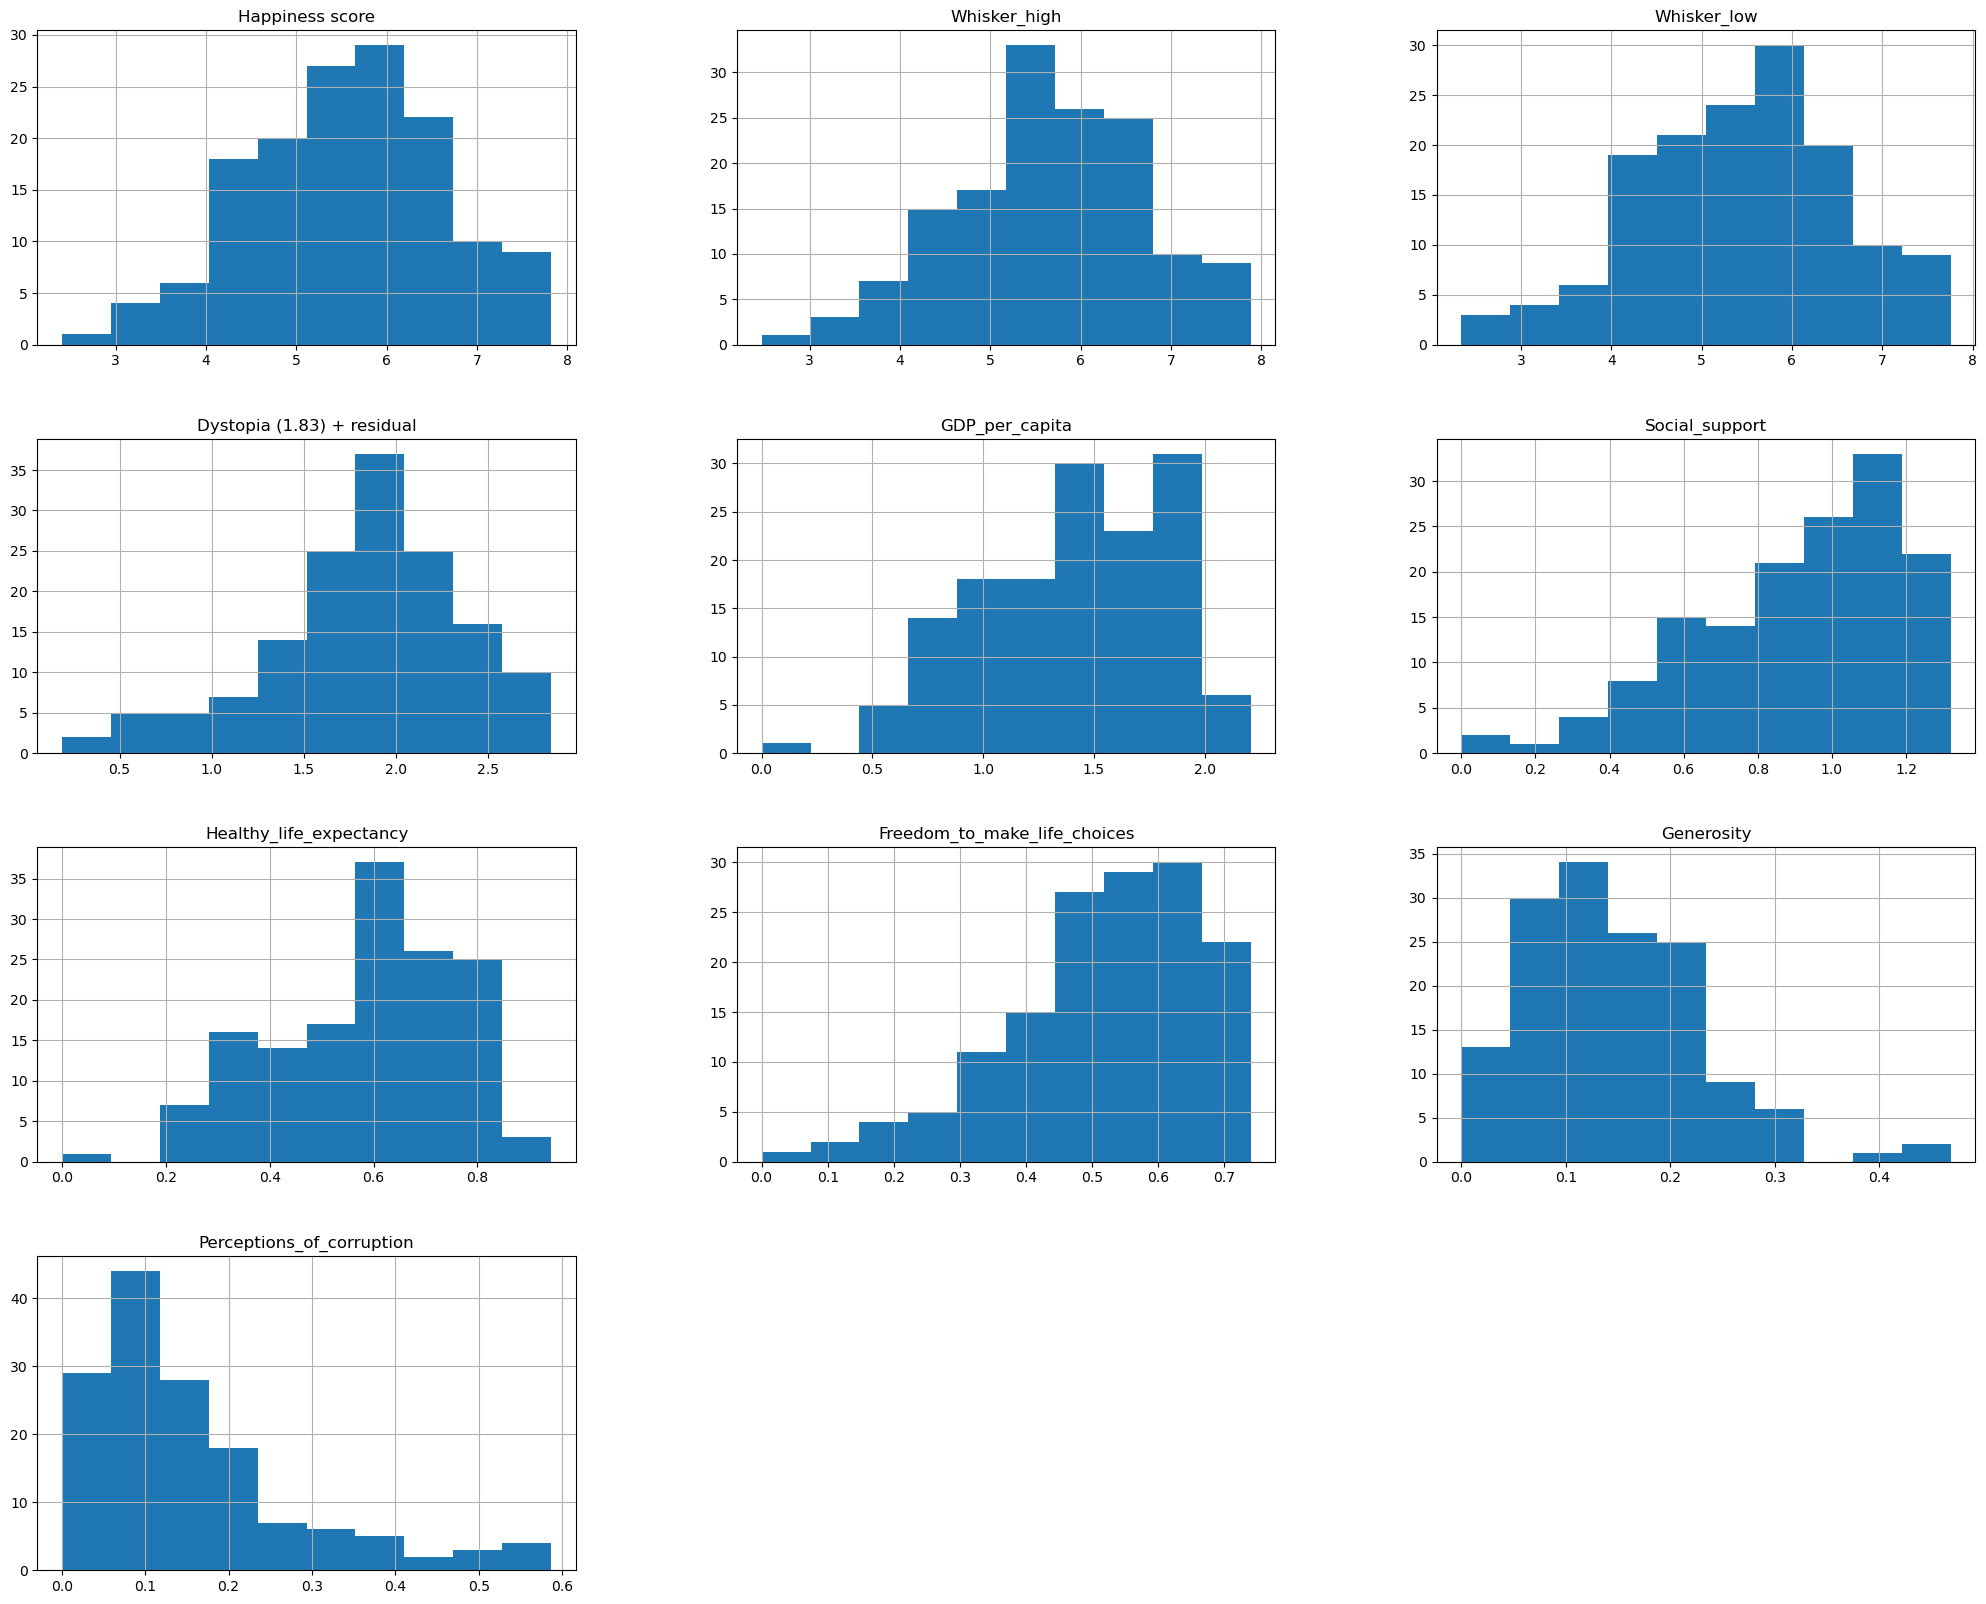

In [27]:
Happiness.drop('Rank',axis=1).hist(figsize=(25,20));

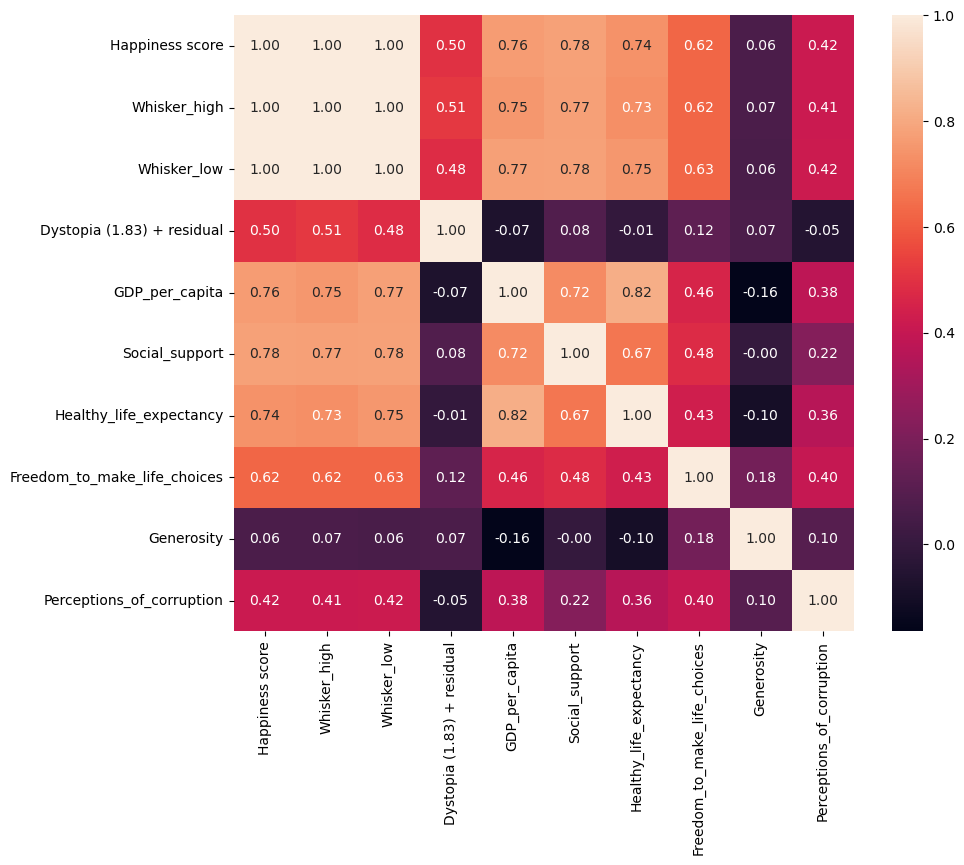

In [35]:
corr_matrix = Happiness.drop(['Rank','Country'],axis=1).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='0.2f')
plt.show()

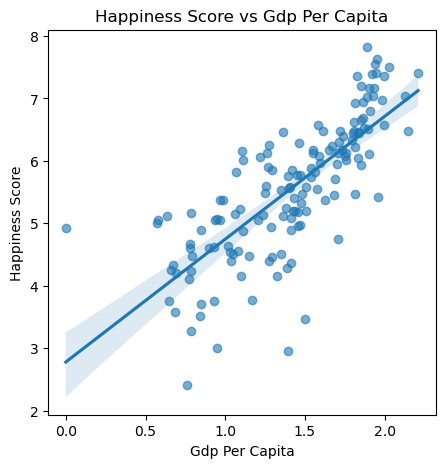

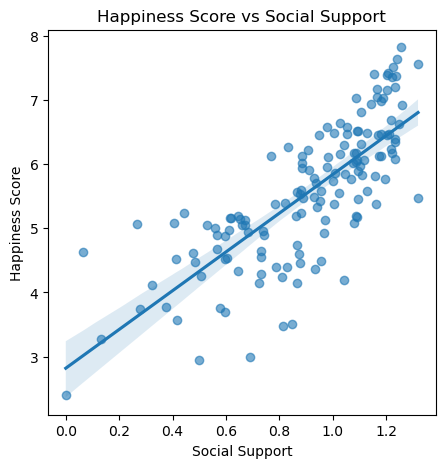

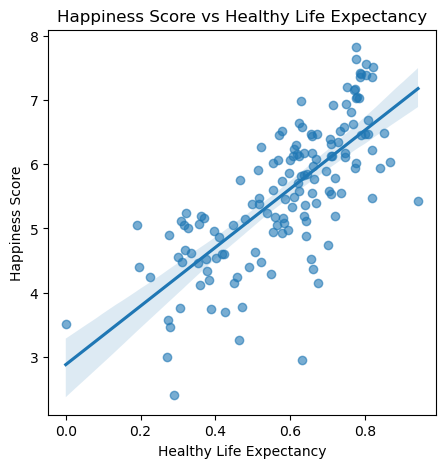

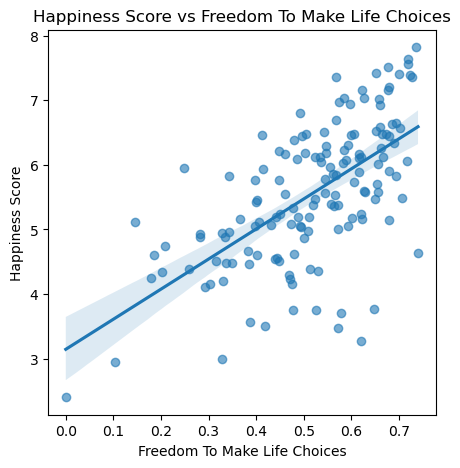

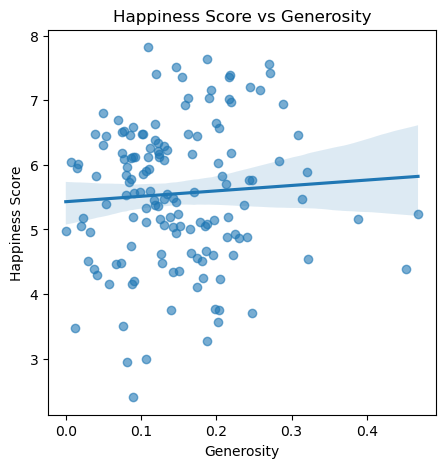

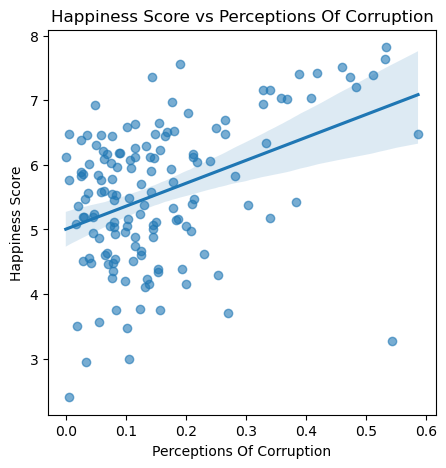

In [44]:
variables = ["GDP_per_capita", "Social_support", "Healthy_life_expectancy", 
             "Freedom_to_make_life_choices", "Generosity", "Perceptions_of_corruption"]

for variable in variables:
    plt.figure(figsize=(5, 5))
    sns.regplot(data=Happiness, x=variable, y="Happiness score", scatter_kws={'alpha':0.6})
    plt.title(f"Happiness Score vs {variable.replace('_', ' ').title()}")
    plt.xlabel(variable.replace('_', ' ').title())
    plt.ylabel("Happiness Score")
    plt.show()

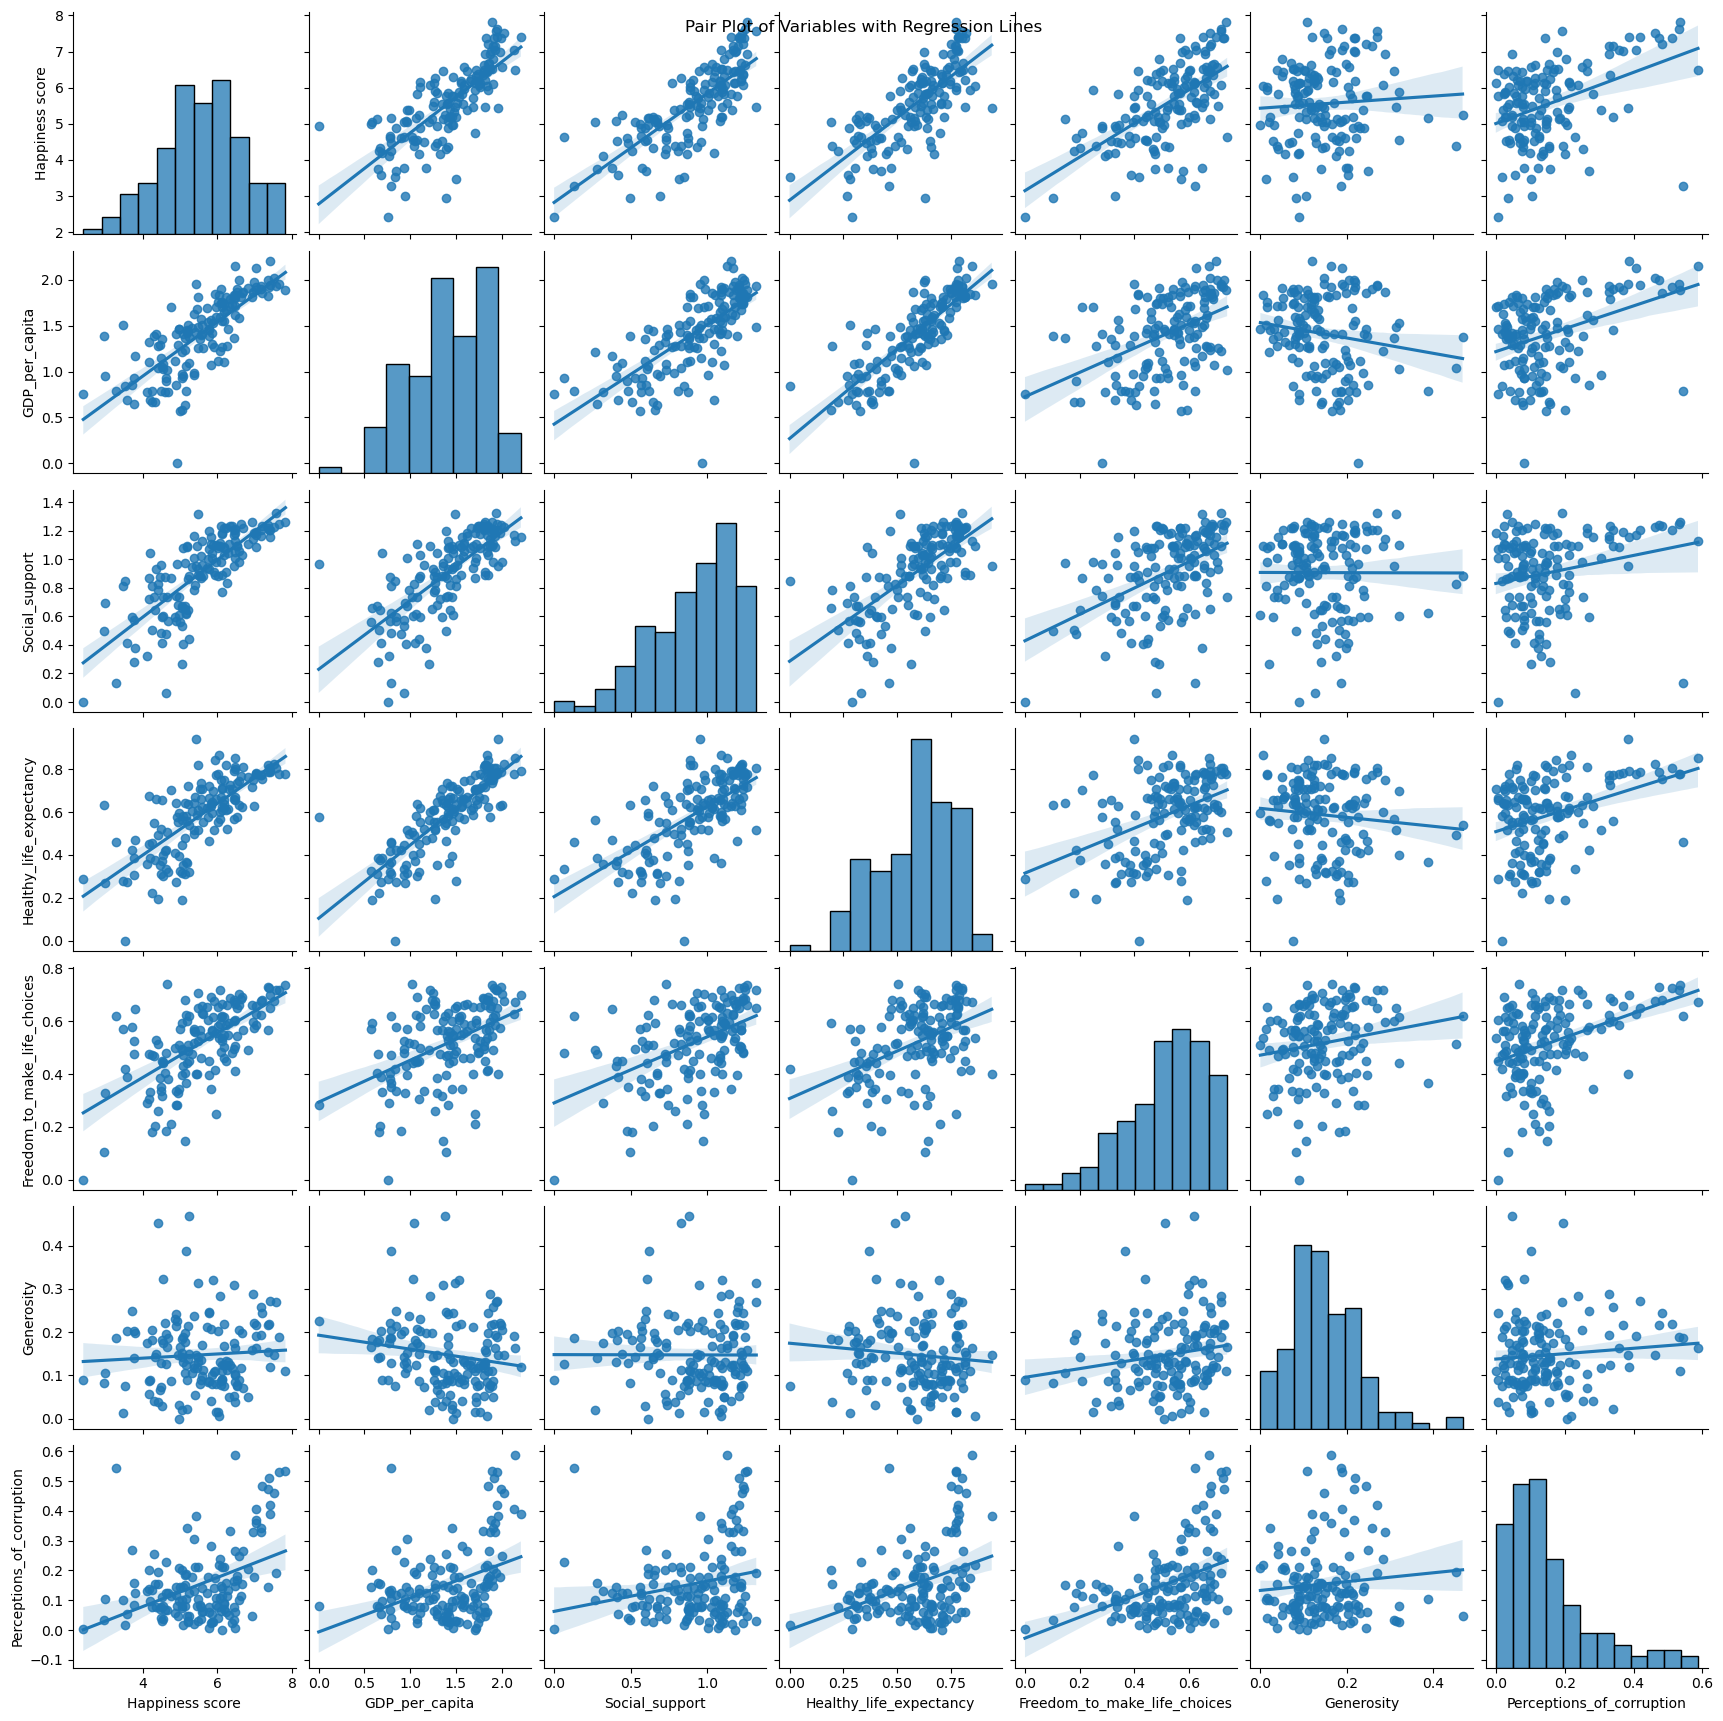

In [43]:
sns.pairplot(data=Happiness, vars=["Happiness score"] + variables, kind='reg')
plt.suptitle("Pair Plot of Variables with Regression Lines")
plt.show()

# Data Analysis

Find the top 10 countries which have the highiest Happiness score.

In [45]:
top_10 = Happiness.sort_values('Happiness score',ascending=False).head(10)

In [46]:
top_10

,Rank,Country,Happiness score,Whisker_high,Whisker_low,Dystopia (1.83) + residual,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
5,6,Luxembourg*,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388
6,7,Sweden,7.384,7.454,7.315,2.003,1.920,1.204,0.803,0.724,0.218,0.512
7,8,Norway,7.365,7.440,7.290,1.925,1.997,1.239,0.786,0.728,0.217,0.474
8,9,Israel,7.364,7.426,7.301,2.634,1.826,1.221,0.818,0.568,0.155,0.143
9,10,New Zealand,7.200,7.279,7.120,1.954,1.852,1.235,0.752,0.680,0.245,0.483


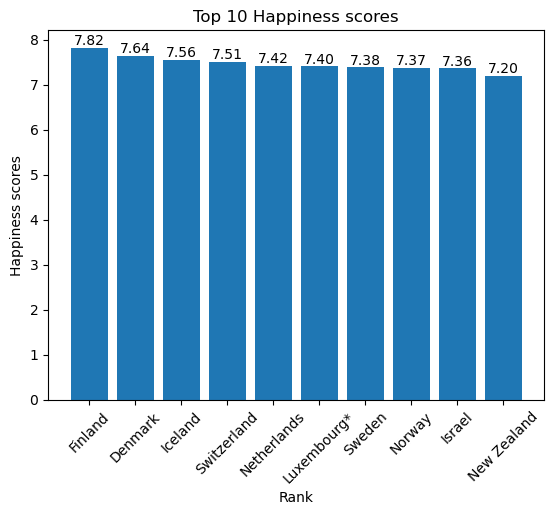

In [54]:
fig, ax=plt.subplots()
ax.bar(top_10["Country"] , top_10["Happiness score"])
ax.set_title("Top 10 Happiness scores")
ax.set_xlabel("Rank")
ax.set_ylabel("Happiness scores")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')


1. The bar chart shows Finland, Denmark, Iceland, Switzerland, Netherlands, Luxembourg, Sweden,Norway, Israel, and New Zealand are the top 10 happiness score countries.

2. The highest score is Finland (7.82) and lowest score is New Zealand (7.2).

# How about these factors in the top 10 happiest countries: GDP per capita, social support, healthy life expectancy, freedom, generosity, and perceptions of corruption?

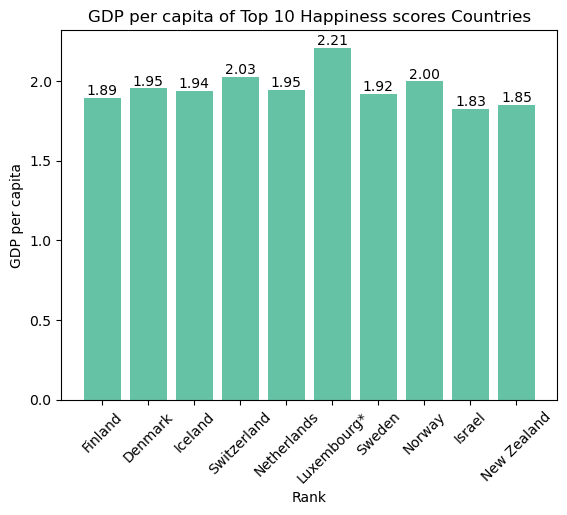

In [57]:
fig, ax=plt.subplots()
ax.bar(top_10["Country"] , top_10["GDP_per_capita"])
ax.set_title("GDP per capita of Top 10 Happiness scores Countries")
ax.set_xlabel("Rank")
ax.set_ylabel("GDP per capita")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')


1. The bar chart depicts the GDP per capita of the top 10 happiest countries.

2. Rank 1 doesn't have the highest GDP per capita; instead, Luxembourg holds the highest GDP per capita among these 10 countries.

3. The lowest GDP per capita among these 10 countries is Israel.

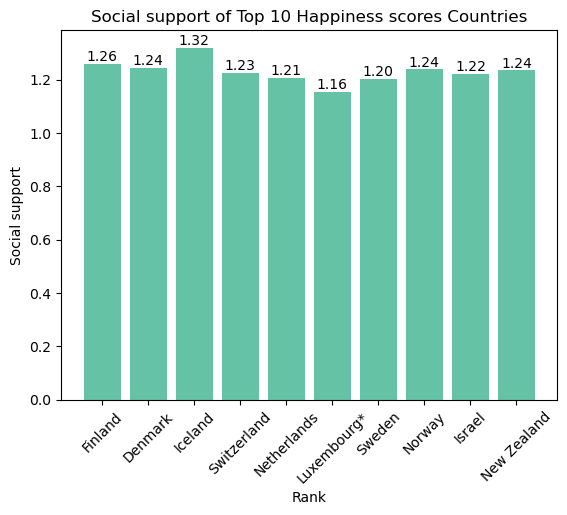

In [58]:
fig, ax=plt.subplots()
ax.bar(top_10["Country"] , top_10["Social_support"])
ax.set_title("Social support of Top 10 Happiness scores Countries")
ax.set_xlabel("Rank")
ax.set_ylabel("Social support")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

1. The bar chart depicts the social support of the top 10 happiest countries.
2. Rank 1 doesn't have the highest social support; instead, Iceland holds the highest social support among these 10 countries.
3. Luxembourg has the highest GDP per capita among these 10 countries, but it displays the lowest level of social support.

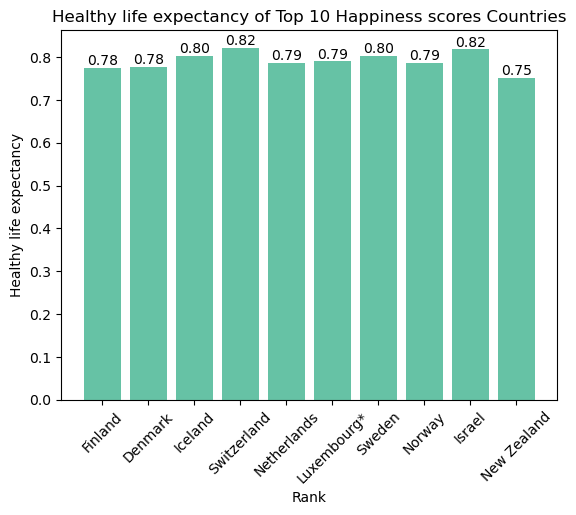

In [59]:
fig, ax=plt.subplots()
ax.bar(top_10["Country"] , top_10["Healthy_life_expectancy"])
ax.set_title("Healthy life expectancy of Top 10 Happiness scores Countries")
ax.set_xlabel("Rank")
ax.set_ylabel("Healthy life expectancy")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

1. The bar chart depicts the healthy life expectancy of the top 10 happiest countries.
2. Rank 1 doesn't have the highest Healthy life expectancy; instead, Switzerland and Israel hold the highest Healthy life expectancy among these 10 countries.
3. New Zealand displays the lowest healthy life expectancy.

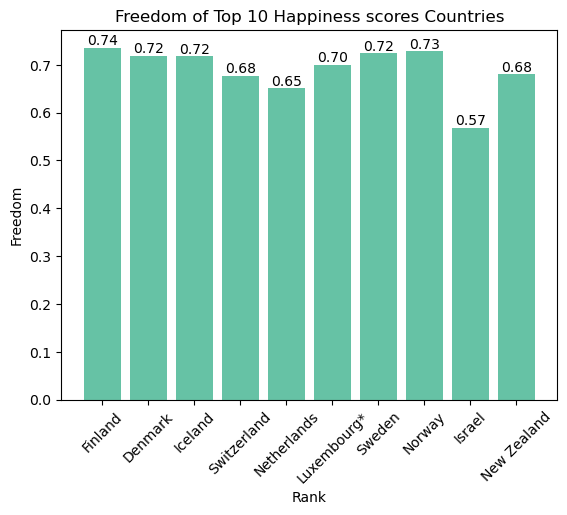

In [60]:
fig, ax=plt.subplots()
ax.bar(top_10["Country"] , top_10["Freedom_to_make_life_choices"])
ax.set_title("Freedom of Top 10 Happiness scores Countries")
ax.set_xlabel("Rank")
ax.set_ylabel("Freedom")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

1. The bar chart depicts the freedom of the top 10 happiest countries.
2. Finland hold the highest freedom among these 10 countries.
3. Although Israel included in top 10 hapiness score, but it displays the lowest freedom.

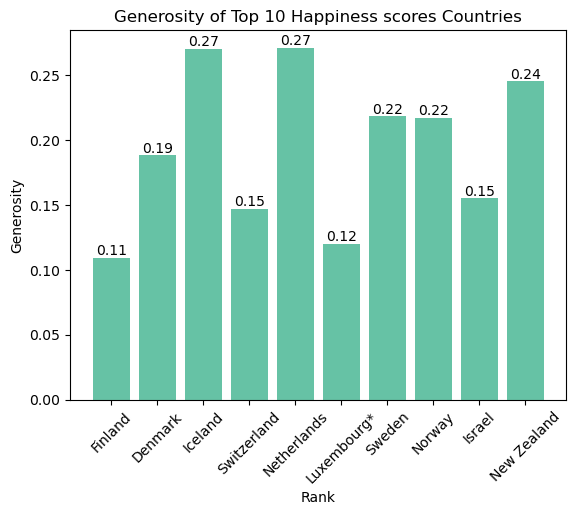

In [61]:
fig, ax=plt.subplots()
ax.bar(top_10["Country"] , top_10["Generosity"])
ax.set_title("Generosity of Top 10 Happiness scores Countries")
ax.set_xlabel("Rank")
ax.set_ylabel("Generosity")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

1. The bar chart depicts the generosity of the top 10 happiest countries.
2. Rank 1 and country with the top GDP per capita do not have the highest generosity; instead, Iceland and Netherlands hold the highest generosity among these 10 countries.
3. Luxembourg has the highest GDP per capita among these 10 countries, but it displays the lowest level of generosity.

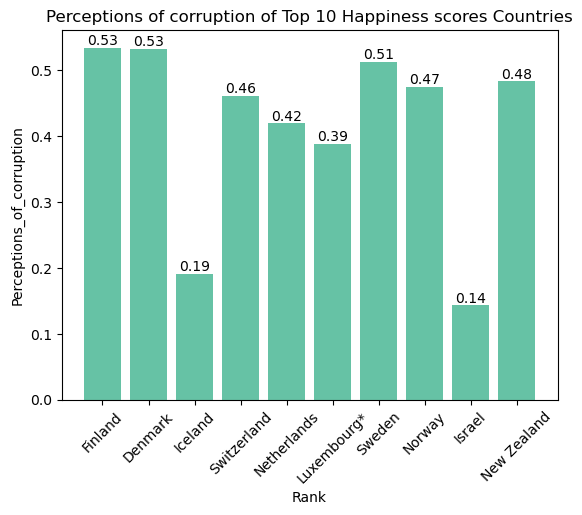

In [62]:
fig, ax=plt.subplots()
ax.bar(top_10["Country"] , top_10["Perceptions_of_corruption"])
ax.set_title("Perceptions of corruption of Top 10 Happiness scores Countries")
ax.set_xlabel("Rank")
ax.set_ylabel("Perceptions of corruption")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

1. The bar chart depicts the perceptions of corruption of the top 10 happiest countries.
2. Finland and Denmark hold the highest perceptions of corruption among these 10 countries.
3. Israel displays the lowest level of perceptions of corruption.

# Find the top 10 countries which have the lowest Happiness score.

In [63]:
bottom_10=Happiness.sort_values('Happiness score',ascending=True).head(10)

In [64]:
bottom_10

,Rank,Country,Happiness score,Whisker_high,Whisker_low,Dystopia (1.83) + residual,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
140,141,Lesotho*,3.512,3.748,3.276,1.312,0.839,0.848,0.000,0.419,0.076,0.018
139,140,Sierra Leone,3.574,3.732,3.416,1.556,0.686,0.416,0.273,0.387,0.202,0.055
138,139,Tanzania,3.702,3.847,3.558,0.735,0.848,0.597,0.425,0.578,0.248,0.270
137,138,Malawi,3.750,3.941,3.560,1.661,0.648,0.279,0.388,0.477,0.140,0.157
136,137,Zambia,3.760,3.902,3.618,1.135,0.930,0.577,0.306,0.525,0.203,0.083


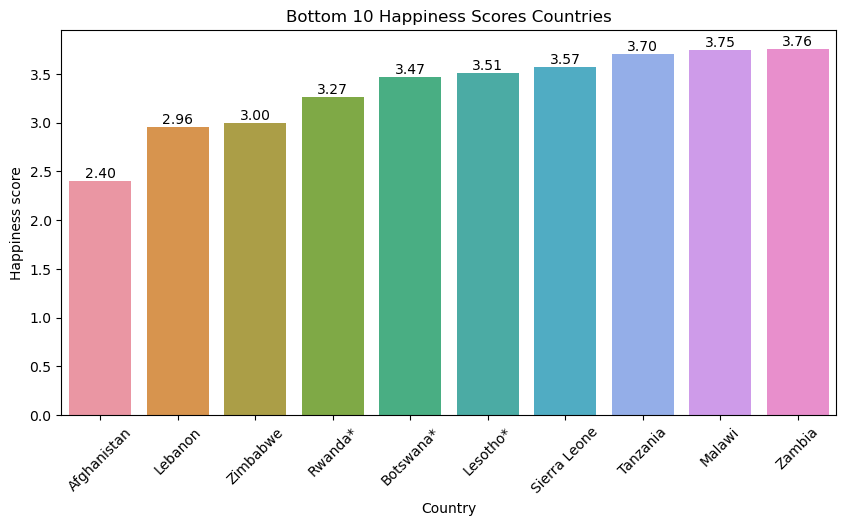

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(x="Country",
           y="Happiness score",
           data=bottom_10)
plt.title("Bottom 10 Happiness Scores Countries")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

1. The bar chart shows Afghanistan, Lebanon, Zimbabwe, Rwanda, Botswana, Lesotho, Sierra Leone,Tanzania, Malawi and Zambia are the bottom 10 happiness score countries.
2. The highest score is Zambia (3.76) and lowest score is Afghanistan (2.4).

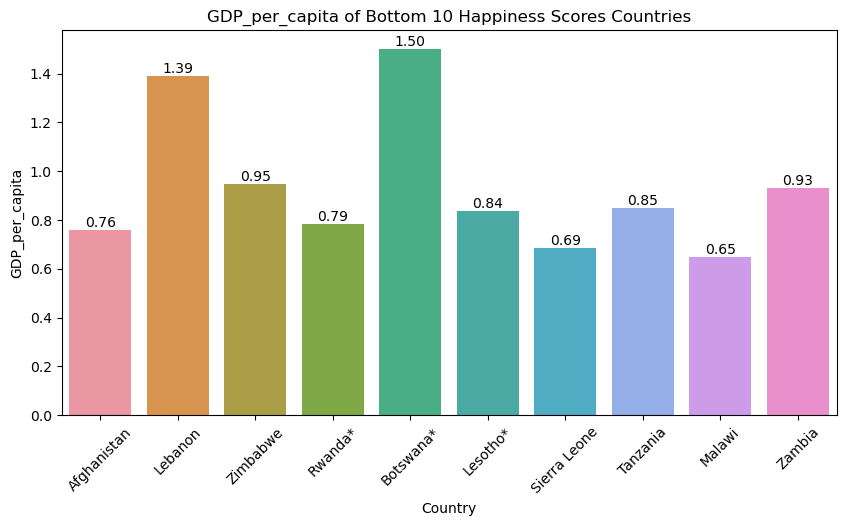

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(x="Country",
           y="GDP_per_capita",
           data=bottom_10)

plt.title("GDP_per_capita of Bottom 10 Happiness Scores Countries")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

1. The bar chart depicts the GDP per capita of the bottom 10 happiness score countries.
2. Botswana has the highest GDP per capita among these 10 countries.
3. The lowest hapiness score does not have the lowest GDP per capita; instead, Malawi hold the lowest GDP per capita among these 10 countries.

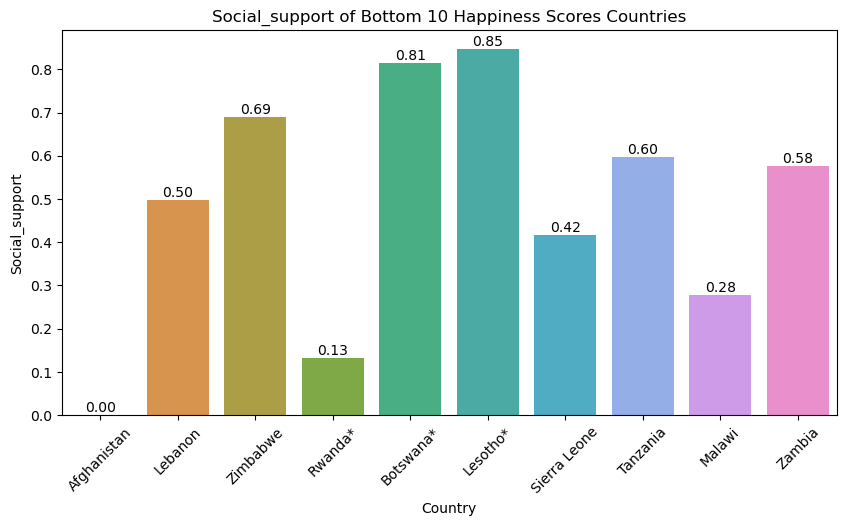

In [79]:
plt.figure(figsize=(10,5))
sns.barplot(x="Country",
           y="Social_support",
           data=bottom_10)
plt.title("Social_support of Bottom 10 Happiness Scores Countries")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

1. The bar chart depicts the social support of the bottom 10 happiness score countries.
2. Lesotho has the highest social support among these 10 countries.
3. The lowest hapiness score hold the lowest social support (0) among these 10 countries.

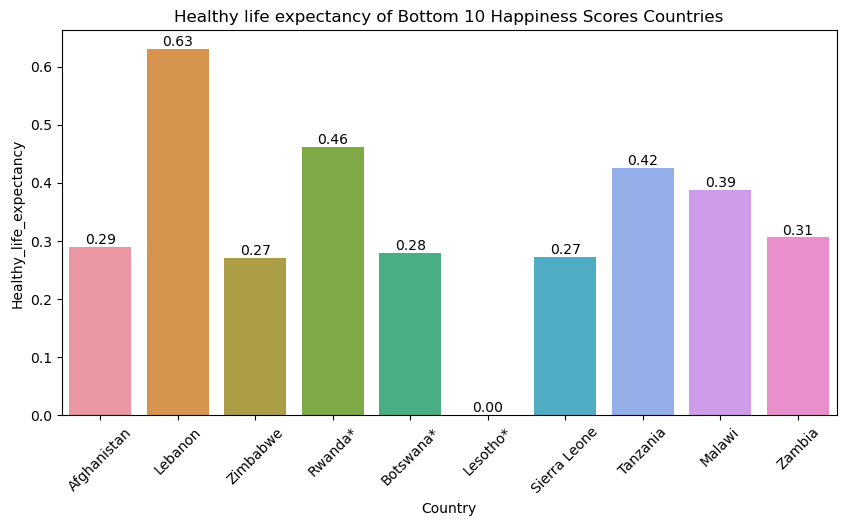

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(x="Country",
           y="Healthy_life_expectancy",
           data=bottom_10)
plt.title("Healthy life expectancy of Bottom 10 Happiness Scores Countries")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

1. The bar chart depicts the healthy life expectancy of the bottom 10 happiness score countries.
2. Lebanon has the highest healthy life expectancy among these 10 countries.
3. The lowest hapiness score does not have the lowest healthy life expectancy; instead, Lesotho hold the lowest healthy life expectancy among these 10 countries.

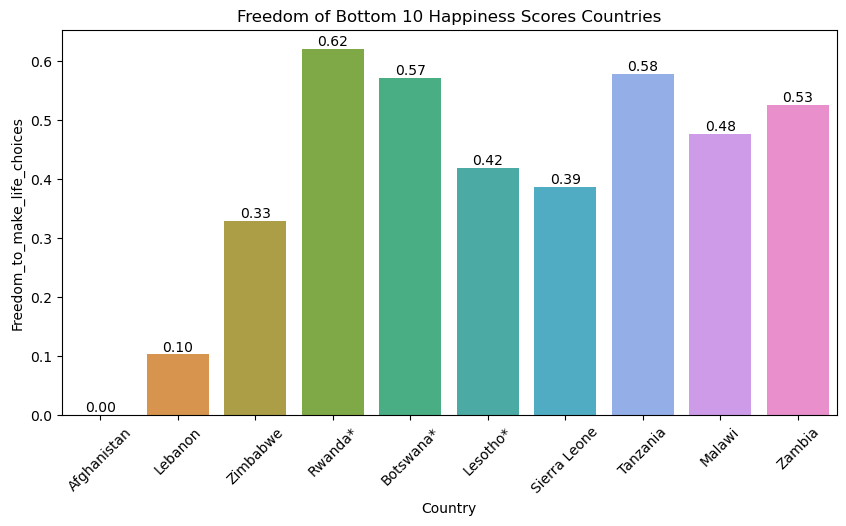

In [81]:
plt.figure(figsize=(10,5))
sns.barplot(x="Country",
           y="Freedom_to_make_life_choices",
           data=bottom_10)
plt.title("Freedom of Bottom 10 Happiness Scores Countries")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

1. The bar chart depicts the freedom of the bottom 10 happiness score countries.
2. Rwanda has the highest freedom among these 10 countries.
3. The lowest hapiness score hold the lowest freedom among these 10 countries.

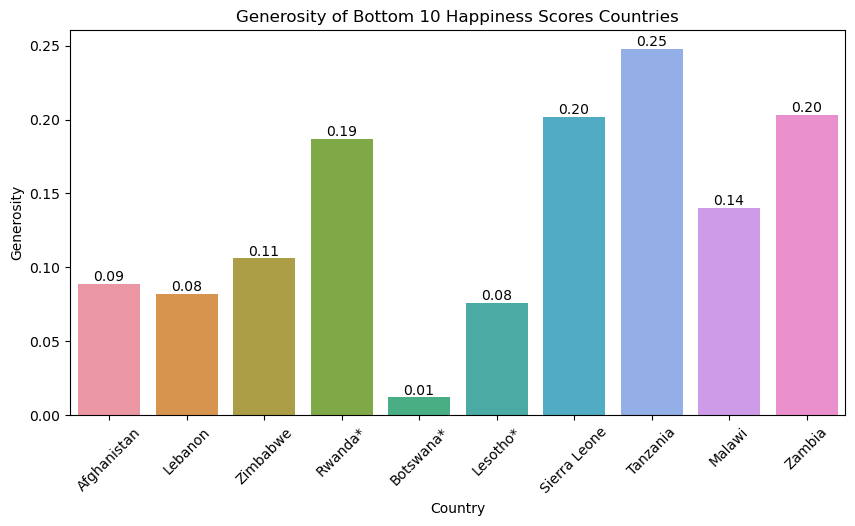

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(x="Country",
           y="Generosity",
           data=bottom_10)
plt.title("Generosity of Bottom 10 Happiness Scores Countries")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

1. The bar chart depicts the generosity of the bottom 10 happiness score countries.
2. Tanzania has the highest generosity among these 10 countries.
3. The lowest hapiness score does not have the lowest generosity; instead, Botswana hold the lowest generosity among these 10 countries.

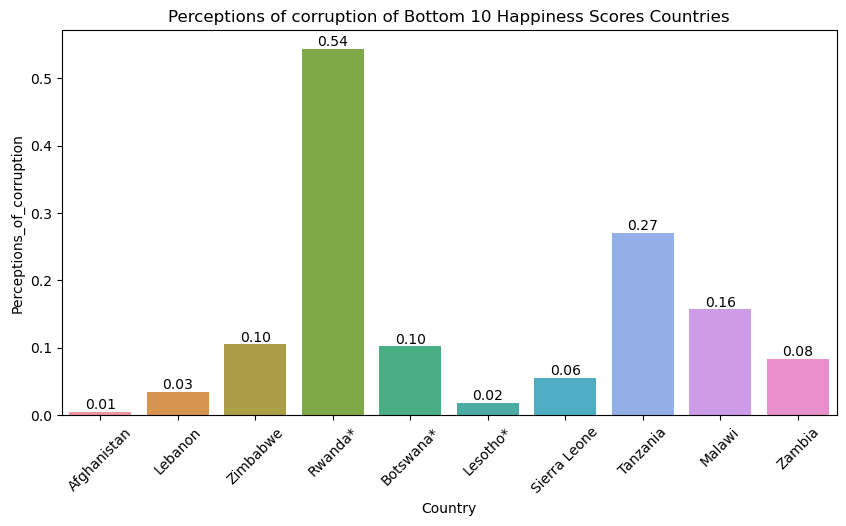

In [83]:
plt.figure(figsize=(10,5))
sns.barplot(x="Country",
           y="Perceptions_of_corruption",
           data=bottom_10)
plt.title("Perceptions of corruption of Bottom 10 Happiness Scores Countries")
plt.xticks(rotation=45)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

1. The bar chart depicts the perceptions of corruption of the bottom 10 happiness score countries.
2. Rwanda has the highest perceptions of corruption among these 10 countries.
3. Afghanistan,Lesotho and Lebanon hold the lowest perceptions of corruption among these 10 countries.

# Conclusion

# Most of the top 10 happiest countries share common traits like high GDP per capita, social support, and healthy life expectancy.

# Similarly, many of the Bottom 10 happiness score countries share characteristics such as low GDP per capita, social support, healthy life expectancy, generosity, and perceptions of corruption.